In [ ]:
import sys
import pandas as pd
import yfinance as yf

Read tickers data from Wikipedia and download adjusted close price.

In [ ]:
def get_tickers():
    table = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
    tickers_df = table[0]
    tickers_list = tickers_df['Symbol'].tolist()
    return tickers_list


tickers = get_tickers()
print(tickers)

['MMM', 'AOS', 'ABT', 'ABBV', 'ACN', 'ATVI', 'ADM', 'ADBE', 'ADP', 'AAP', 'AES', 'AFL', 'A', 'APD', 'AKAM', 'ALK', 'ALB', 'ARE', 'ALGN', 'ALLE', 'LNT', 'ALL', 'GOOGL', 'GOOG', 'MO', 'AMZN', 'AMCR', 'AMD', 'AEE', 'AAL', 'AEP', 'AXP', 'AIG', 'AMT', 'AWK', 'AMP', 'ABC', 'AME', 'AMGN', 'APH', 'ADI', 'ANSS', 'AON', 'APA', 'AAPL', 'AMAT', 'APTV', 'ACGL', 'ANET', 'AJG', 'AIZ', 'T', 'ATO', 'ADSK', 'AZO', 'AVB', 'AVY', 'BKR', 'BALL', 'BAC', 'BBWI', 'BAX', 'BDX', 'WRB', 'BRK.B', 'BBY', 'BIO', 'TECH', 'BIIB', 'BLK', 'BK', 'BA', 'BKNG', 'BWA', 'BXP', 'BSX', 'BMY', 'AVGO', 'BR', 'BRO', 'BF.B', 'CHRW', 'CDNS', 'CZR', 'CPT', 'CPB', 'COF', 'CAH', 'KMX', 'CCL', 'CARR', 'CTLT', 'CAT', 'CBOE', 'CBRE', 'CDW', 'CE', 'CNC', 'CNP', 'CDAY', 'CF', 'CRL', 'SCHW', 'CHTR', 'CVX', 'CMG', 'CB', 'CHD', 'CI', 'CINF', 'CTAS', 'CSCO', 'C', 'CFG', 'CLX', 'CME', 'CMS', 'KO', 'CTSH', 'CL', 'CMCSA', 'CMA', 'CAG', 'COP', 'ED', 'STZ', 'CEG', 'COO', 'CPRT', 'GLW', 'CTVA', 'CSGP', 'COST', 'CTRA', 'CCI', 'CSX', 'CMI', 'CVS', 'D

In [ ]:
df = yf.download(tickers, start='2020-01-01')

[*********************100%***********************]  503 of 503 completed

2 Failed downloads:
- BF.B: No data found for this date range, symbol may be delisted
- BRK.B: No timezone found, symbol may be delisted


Calculate daily returns and create graph of the daily equity returns.

In [78]:
import numpy as np

daily_returns = df['Adj Close'].pct_change()
daily_returns_log =  np.log(df['Adj Close']).diff()
print(daily_returns)

                   A       AAL       AAP      AAPL      ABBV       ABC  \
Date                                                                     
2020-01-02       NaN       NaN       NaN       NaN       NaN       NaN   
2020-01-03 -0.016055 -0.049502  0.000063 -0.009722 -0.009492 -0.012576   
2020-01-06  0.002956 -0.011935 -0.016435  0.007968  0.007892  0.014641   
2020-01-07  0.003065 -0.003660 -0.011862 -0.004703 -0.005705 -0.007156   
2020-01-08  0.009873  0.022777 -0.011488  0.016086  0.007087  0.009689   
...              ...       ...       ...       ...       ...       ...   
2023-02-27  0.006940  0.004499  0.012820  0.008248  0.010281 -0.012234   
2023-02-28 -0.001477  0.022393  0.030790 -0.003448 -0.002463 -0.006831   
2023-03-01 -0.031415  0.003129 -0.042357 -0.014246  0.008902  0.006107   
2023-03-02  0.030252  0.005614  0.002809  0.004129 -0.005732 -0.010287   
2023-03-03  0.013906  0.019541 -0.009338  0.000000  0.005700  0.006068   

                 ABT      ACGL       

Text(0.5, 1.0, 'Daily Returns in the S&P500')

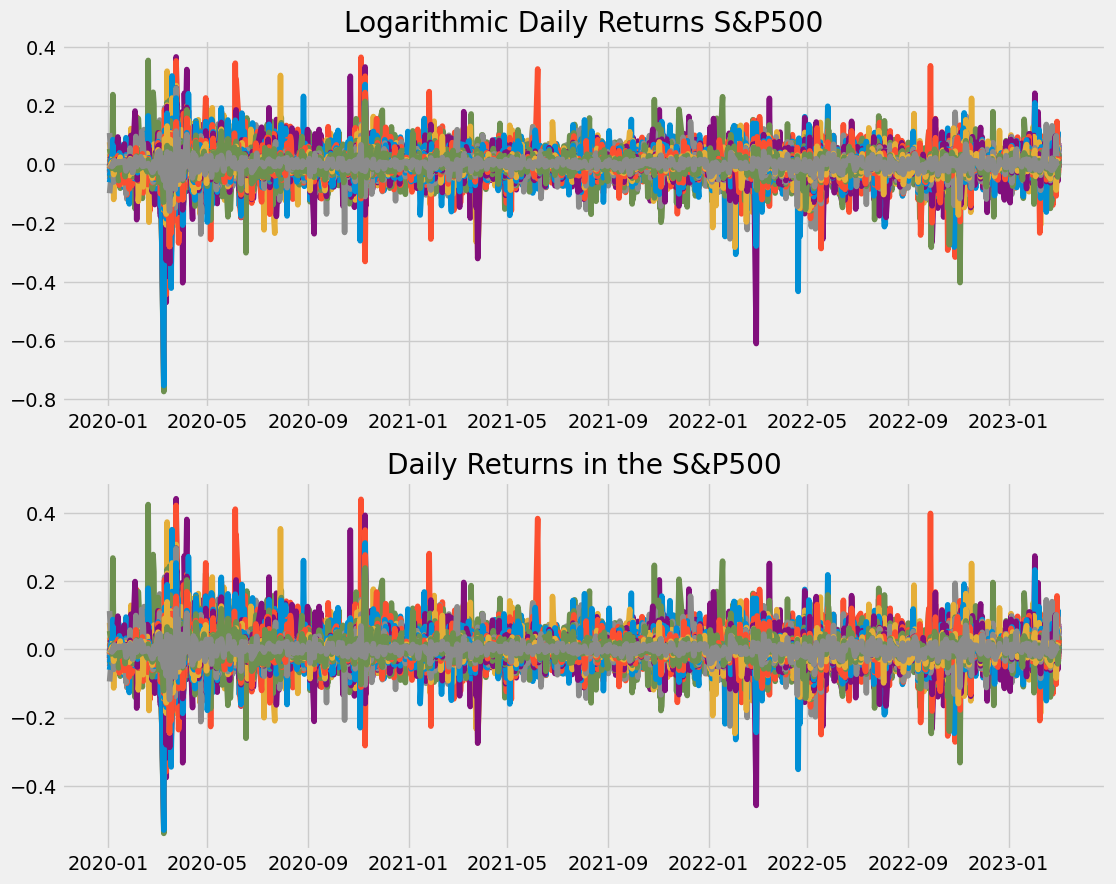

In [79]:
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
fig, (ax1, ax2) = plt.subplots(nrows=2,  ncols=1, figsize=(12, 10))
ax1.plot(daily_returns_log)
ax1.set_title('Logarithmic Daily Returns S&P500')
ax2.plot(daily_returns)
ax2.set_title('Daily Returns in the S&P500')

Calculate total cumulative returns (change in price over time) and create graph of the cumulative equity returns.

,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACGL,ACN,ADBE,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,-0.016055,-0.049502,0.000063,-0.009722,-0.009492,-0.012576,-0.012191,-0.001152,-0.001665,-0.007834,...,-0.014833,0.004809,-0.008039,-0.011066,0.005886,-0.003132,-0.002614,-0.011924,-0.014111,0.000149
2020-01-06,-0.013147,-0.060846,-0.016373,-0.001831,-0.001675,0.001881,-0.007016,0.002765,-0.008185,-0.002153,...,-0.016783,0.003366,-0.000423,-0.005621,-0.000626,-0.003719,-0.008378,-0.004361,-0.026125,-0.007529
2020-01-07,-0.010122,-0.064283,-0.028041,-0.006526,-0.007370,-0.005289,-0.012536,-0.005530,-0.029598,-0.003110,...,-0.012117,0.001282,-0.008604,-0.000351,-0.004383,-0.001957,-0.009249,-0.010303,-0.032037,-0.004175
2020-01-08,-0.000349,-0.042970,-0.039207,0.009455,-0.000335,0.004349,-0.008511,-0.015438,-0.027695,0.010286,...,-0.005919,0.000321,-0.023554,0.010188,-0.001002,-0.000196,0.002614,-0.044378,-0.022502,-0.006336
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-27,0.687689,-0.460716,-0.064604,1.013904,0.998478,0.932241,0.208856,0.594700,0.326385,-0.036211,...,-0.261683,0.137058,0.872501,-0.374045,0.334883,0.314520,-0.129247,0.143127,0.059070,0.259571
2023-02-28,0.685197,-0.448640,-0.035803,1.006960,0.993556,0.919041,0.232483,0.612903,0.322897,-0.031337,...,-0.239002,0.122628,0.861661,-0.310272,0.336185,0.320648,-0.125222,0.158640,0.063904,0.271217
2023-03-01,0.632256,-0.446915,-0.076643,0.978369,1.011302,0.930760,0.221699,0.635253,0.313133,-0.033041,...,-0.211966,0.100026,0.878260,-0.323135,0.315878,0.310677,-0.137863,0.166705,0.060121,0.275556


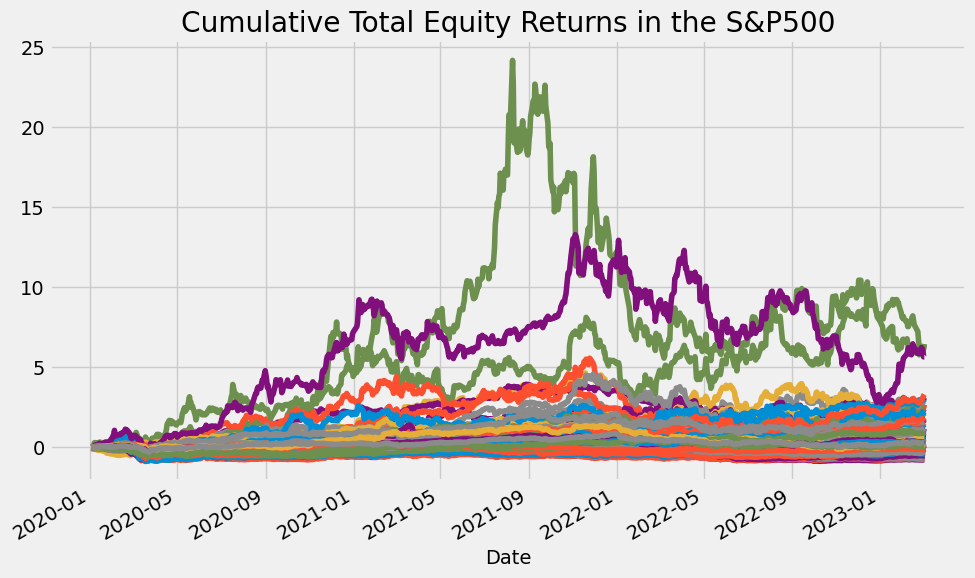

In [80]:
#cumulative_returns = np.exp(daily_returns.cumsum())
cumulative_returns = (1 + daily_returns).cumprod() - 1
cumulative_returns.plot(legend=0, figsize=(10,6), grid=True, title='Cumulative Total Equity Returns in the S&P500')
plt.tight_layout()
cumulative_returns

Calculate total cumulative return for each stock.

In [81]:
total_cumulative_returns = cumulative_returns.iloc[:, 1:].tail(1)
total_cumulative_returns * 100

,AAL,AAP,AAPL,ABBV,ABC,ABT,ACGL,ACN,ADBE,ADI,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2023-03-03 00:00:00,-43.294137,-8.269634,98.653788,101.11725,92.249469,24.350893,64.65437,33.764339,2.542989,63.616614,...,-18.457934,12.567041,91.145854,-30.438365,34.920162,33.996529,-10.763744,19.217406,2.712353,29.245462


Principal component analysis on the daily equity returns. 

             A       AAL       AAP      AAPL      ABBV       ABC       ABT  \
A     0.000393  0.000280  0.000197  0.000278  0.000142  0.000168  0.000242   
AAL   0.000280  0.002072  0.000375  0.000314  0.000131  0.000217  0.000174   
AAP   0.000197  0.000375  0.000543  0.000218  0.000154  0.000195  0.000164   
AAPL  0.000278  0.000314  0.000218  0.000526  0.000145  0.000180  0.000239   
ABBV  0.000142  0.000131  0.000154  0.000145  0.000273  0.000169  0.000155   
...        ...       ...       ...       ...       ...       ...       ...   
YUM   0.000176  0.000377  0.000221  0.000208  0.000119  0.000157  0.000162   
ZBH   0.000215  0.000482  0.000217  0.000222  0.000148  0.000180  0.000181   
ZBRA  0.000338  0.000429  0.000278  0.000390  0.000144  0.000196  0.000259   
ZION  0.000225  0.000694  0.000299  0.000223  0.000144  0.000235  0.000169   
ZTS   0.000268  0.000219  0.000215  0.000284  0.000161  0.000175  0.000240   

          ACGL       ACN      ADBE  ...      WYNN       XEL    

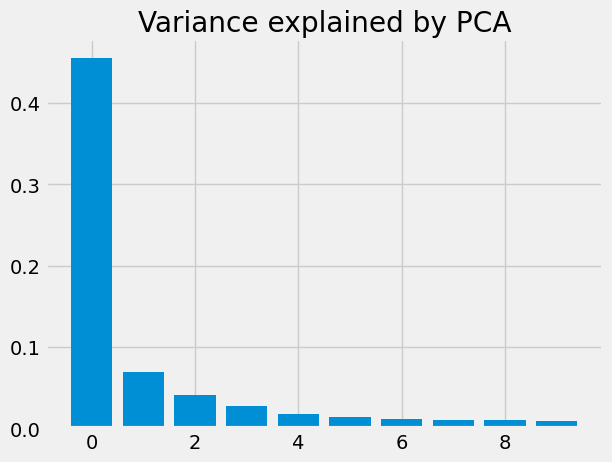

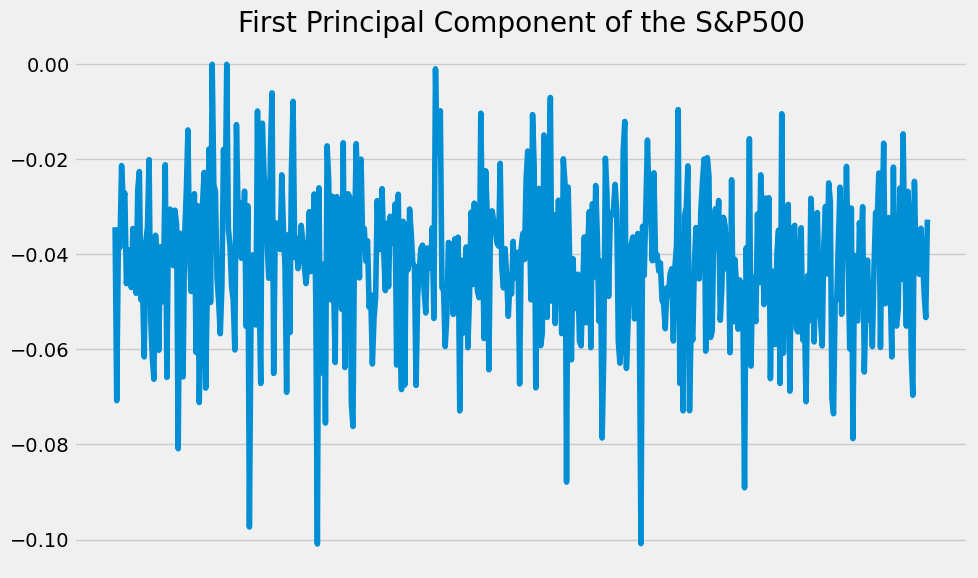

In [117]:
from sklearn.decomposition import PCA

# Calculate stock's daily return covariance

daily_returns_cov = daily_returns[1:].cov()
print(daily_returns_cov)

# PCA using SKLEARN, n=10 first ten components (eigenvectors)

pca_decomp = PCA(n_components=10)
pca_model = pca_decomp.fit_transform(daily_returns.fillna(0))
#pca_model = daily_returns.fillna(0).dot(pca_decomp.components_.T)
#pca_model = pca_model - pca_model.mean(axis=0)

# Graph variance explained by PCA

plt.bar(range(10), pca_decomp.explained_variance_ratio_)
plt.title('Variance explained by PCA')
plt.show()

# Plot first principal component

first_pc = pd.Series(index=daily_returns.columns, data=pca_decomp.components_[0,:])

first_pc.plot(figsize=(10,6), xticks=[], grid=True, title='First Principal Component of the S&P500')
plt.tight_layout()

Calculate first eigenvector loadings. Normalize weights to 1.

<Axes: xlabel='Date'>

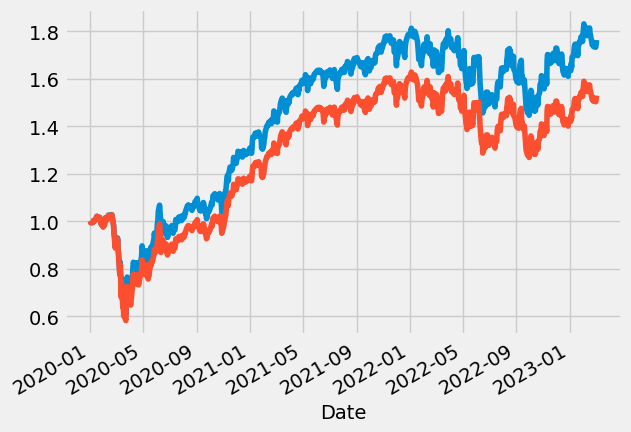

In [124]:
first_pc_weights = abs(first_pc)/sum(abs(first_pc))
weighted_daily_returns = (first_pc_weights*daily_returns).sum(1)
weighted_daily_returns.cumsum().apply(np.exp).plot()

weighted_daily_returns = (1 + weighted_daily_returns).cumprod() 
weighted_daily_returns.plot()




Use SP&500 portfolio daily returns as beta for first component portfolio.

In [100]:
sp_prices = yf.download(['SPY'], start='2020-01-01')['Adj Close'] 

[*********************100%***********************]  1 of 1 completed


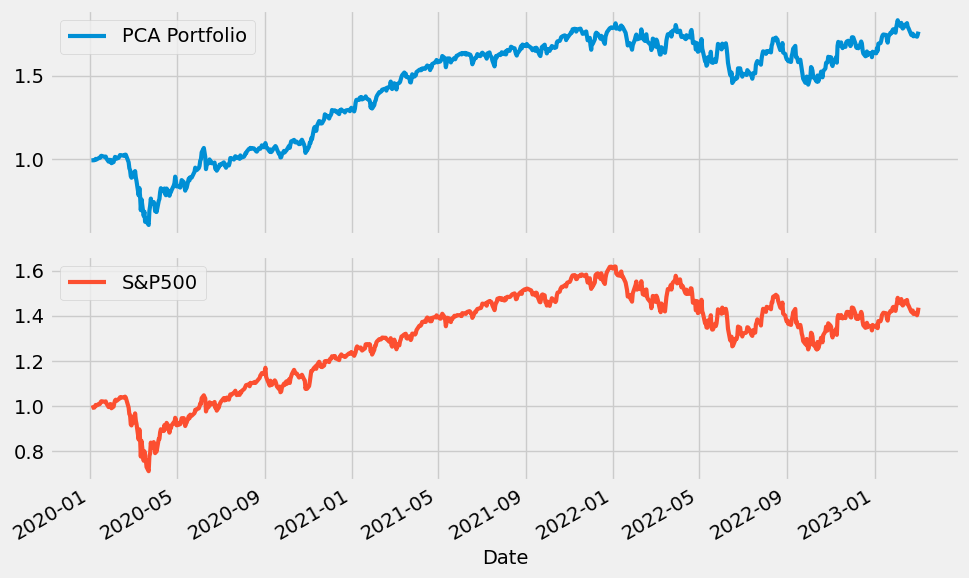

In [102]:
daily_retuns_df = pd.concat([weighted_daily_returns, sp_prices.pct_change()],axis=1)
daily_retuns_df.columns = ["PCA Portfolio", "S&P500"]

daily_retuns_df.dropna().cumsum().apply(np.exp).plot(subplots=True, figsize=(10,6), grid=True, linewidth=3);
plt.tight_layout()

Construct eigen-portfolio using 10 stocks with least nagative weights and compare to SP&500.

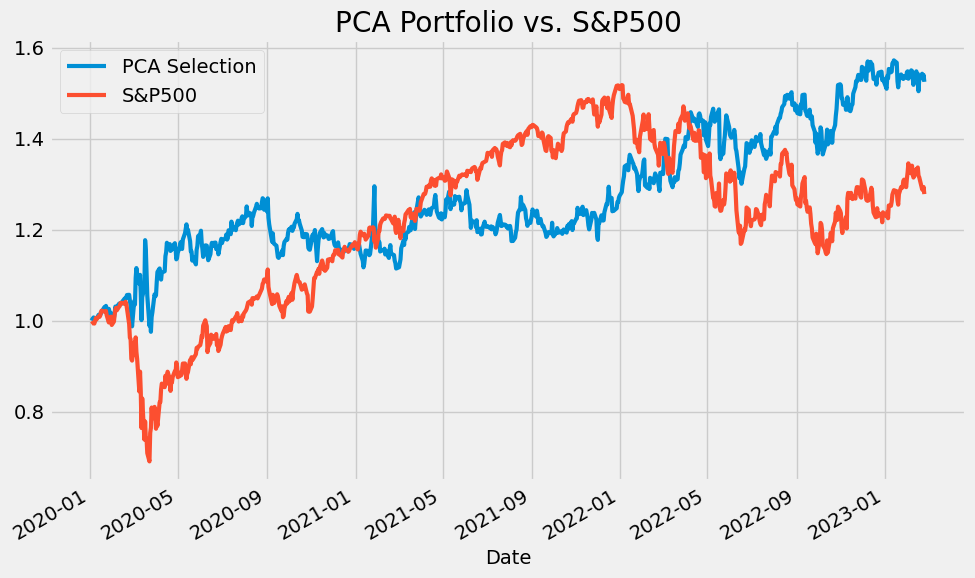

In [29]:
weighted_daily_returns = daily_returns[first_pc.nlargest(10).index].mean(1)
weighted_daily_returns.cumsum().apply(np.exp).plot(figsize=(15,5), grid=True, linewidth=3, title='PCA Portfolio vs. S&P500')
sp_prices['2020':].apply(np.log).diff(1).cumsum().apply(np.exp).plot(figsize=(10,6), grid=True, linewidth=3)
plt.legend(['PCA Selection', 'S&P500'])
plt.tight_layout()